In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [155]:
data = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_type   3565 non-null   object 
 1   society         3565 non-null   object 
 2   sector          3565 non-null   object 
 3   price           3565 non-null   float64
 4   price_per_sqft  3565 non-null   float64
 5   bedRoom         3565 non-null   int64  
 6   bathroom        3565 non-null   int64  
 7   balcony         3565 non-null   object 
 8   floorNum        3565 non-null   float64
 9   agePossession   3565 non-null   object 
 10  built_up_area   3565 non-null   float64
 11  servant room    3565 non-null   int64  
 12  study room      3565 non-null   int64  
 13  pooja room      3565 non-null   int64  
 14  store room      3565 non-null   int64  
 15  others          3565 non-null   int64  
 16  furnished_type  3565 non-null   int64  
 17  luxury_score    3565 non-null   i

In [157]:
# cols to drop 
cols = ['society', 'price_per_sqft']
data.drop(columns = cols, inplace = True)

In [158]:
df = data.copy()

## luxury_score
converting luxury score into a categorical column

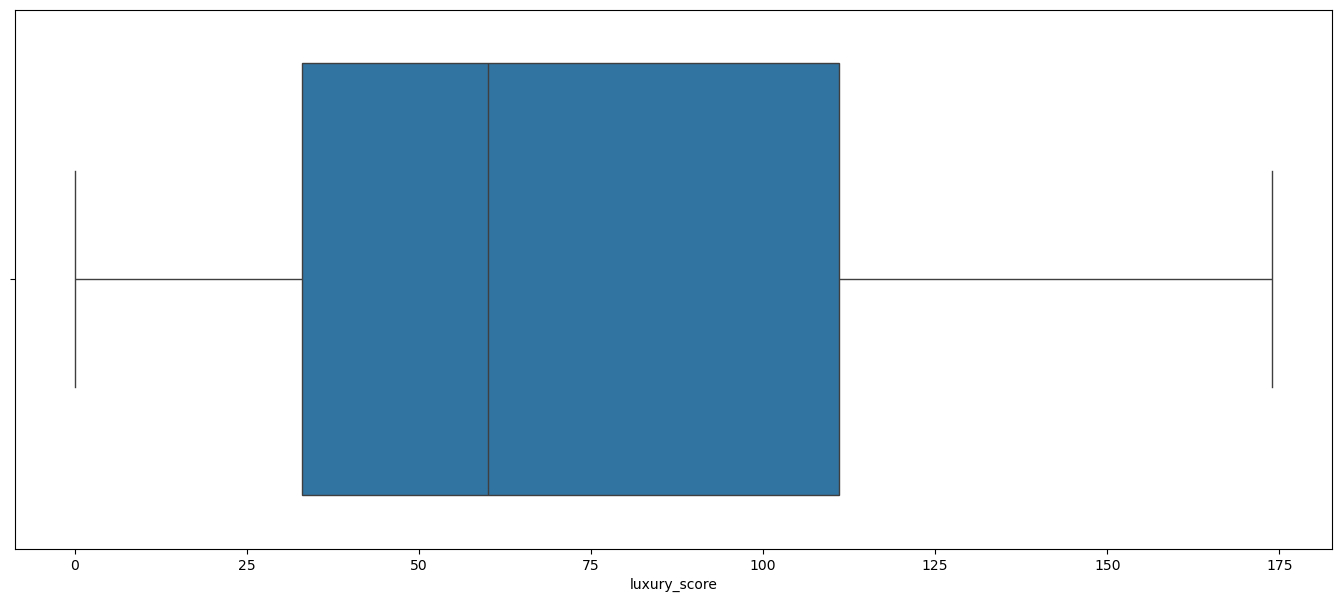

In [159]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['luxury_score'])
plt.show()

In [160]:
def categorize_luxury(score):
    if 0 <= score <= 50:
        return 'Low'
    elif 50 <= score <= 150:
        return 'Medium'
    elif 150 <= score <= df['luxury_score'].max():
        return 'High'
    else:
        return None

In [161]:
df['luxury_category'] = df['luxury_score'].apply(categorize_luxury)

In [162]:
df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,luxury_category
2237,flat,sector 89,0.42,2,2,2,3.0,Relatively New,769.0,0,0,0,0,0,0,0,Low
2630,flat,sector 85,1.11,2,2,3,8.0,Relatively New,1630.0,0,0,0,1,0,0,174,High
2538,flat,sector 61,1.41,2,2,2,2.0,New Property,1150.0,0,1,0,0,0,0,76,Medium
2726,flat,sector 12,0.60,3,3,2,3.0,Relatively New,1178.0,0,0,0,0,0,0,44,Low
3331,flat,sector 48,9.30,4,4,3+,10.0,Moderately Old,3831.0,1,1,1,1,0,1,67,Medium


## floorNum
converting floors in a categorical column

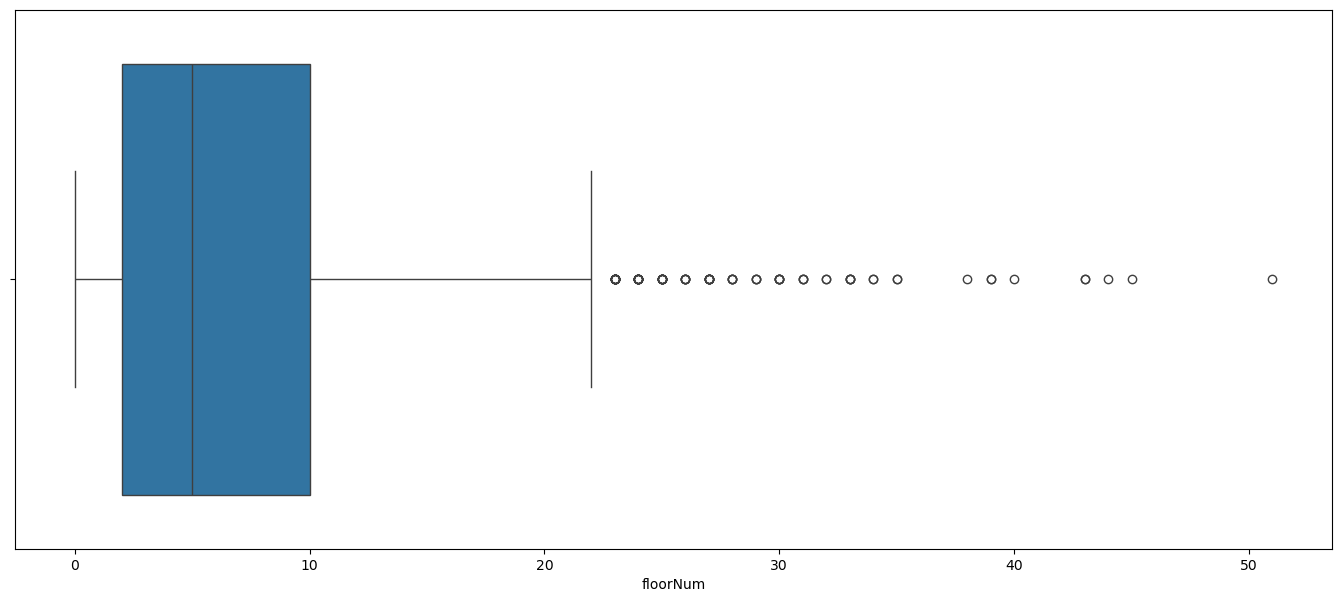

In [163]:
plt.figure(figsize = (17, 7))
sns.boxplot(x = df['floorNum'])
plt.show()

In [164]:
def floor_category(floor):
    if 0 <= floor <= 2:
        return 'Low Floor'
    elif 3 <= floor <= 10:
        return 'Mid Floor'
    elif 11 <= floor <= df['floorNum'].max():
        return 'High Floor'
    else:
        return None

In [165]:
df['floor_category'] = df['floorNum'].apply(floor_category)

In [166]:
df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_score,luxury_category,floor_category
2570,house,sohna road,0.85,3,2,2,1.0,New Property,1120.0,0,0,0,0,0,0,15,Low,Low Floor
1483,flat,sohna road,0.72,2,2,3,3.0,Relatively New,1095.0,0,0,1,0,0,0,158,High,Mid Floor
370,flat,sector 69,1.80,4,4,2,9.0,Relatively New,1819.0,0,0,1,0,0,1,165,High,Mid Floor
1526,house,sector 48,4.95,7,7,3+,2.0,Old Property,2403.0,1,1,1,1,0,1,145,Medium,Low Floor
1678,flat,sector 65,5.40,3,4,3,19.0,Moderately Old,2696.0,1,1,0,0,0,1,174,High,High Floor


In [167]:
cols = ['luxury_score', 'floorNum']
df.drop(columns = cols, inplace = True)

In [168]:
df.sample(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_category,floor_category
1202,flat,sector 99,1.6,3,3,3,Under Construction,1810.0,0,0,0,0,0,0,Low,Mid Floor
1959,house,sector 4,0.6,3,3,1,Old Property,57.0,0,0,0,0,1,0,Low,Low Floor


In [169]:
df.shape

(3565, 16)

# Feature Selection

In [170]:
# convert all categorical col in numbers
from sklearn.preprocessing import OrdinalEncoder

label_data = df.copy()
categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    label_data[col] = oe.fit_transform(label_data[[col]])

In [171]:
X_label = label_data.drop('price', axis = 1)
y_label = label_data['price']

In [172]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnished_type,luxury_category,floor_category
0,0.0,97.0,3,2,0.0,3.0,1120.000000,0,0,0,0,0,0,2.0,1.0
1,0.0,75.0,3,3,2.0,3.0,1938.000000,1,0,0,0,0,1,0.0,2.0
2,0.0,5.0,3,4,4.0,1.0,1734.000000,1,0,0,0,0,0,1.0,2.0
3,0.0,9.0,2,2,2.0,3.0,543.000000,0,0,0,0,0,0,1.0,1.0
4,1.0,43.0,4,4,4.0,0.0,540.000000,1,1,1,0,1,2,2.0,2.0
5,0.0,93.0,3,2,3.0,3.0,1240.000000,0,0,0,0,0,0,2.0,0.0
6,0.0,82.0,3,3,0.0,3.0,1780.000000,0,0,0,0,0,0,1.0,2.0
7,0.0,86.0,3,4,3.0,3.0,2300.000000,0,0,0,0,0,0,1.0,2.0
8,0.0,91.0,3,3,3.0,0.0,1437.000000,1,0,0,0,0,0,2.0,0.0
9,0.0,79.0,2,2,3.0,1.0,1423.000000,0,0,0,0,0,0,1.0,2.0


In [173]:
y_label

0        0.90
1        2.25
2        1.12
3        0.27
4        2.45
5        0.90
6        0.90
7        1.98
8        1.25
9        1.29
10      10.00
11       7.00
12       0.95
13       2.00
14       2.15
15       1.49
16       8.00
17       1.32
18       0.72
19       1.23
20       2.00
21       1.70
22       1.90
23       1.65
24       1.73
25       0.25
26       2.01
27       0.36
28       2.65
29       1.10
30       5.50
31       0.75
32       0.47
33       0.50
34       1.30
35       0.68
36       0.95
37       2.29
38       0.90
39       5.15
40       0.79
41      12.50
42       0.35
43       1.01
44       0.88
45       1.00
46       1.12
47       1.83
48       0.47
49       1.05
50       1.50
51       1.31
52       0.30
53       0.62
54       0.28
55       2.00
56       1.30
57       1.30
58       0.38
59       0.95
60       8.70
61       0.95
62       1.83
63       1.10
64       2.00
65       6.00
66       3.65
67       6.75
68       0.60
69       1.50
70       4.99
71    

## Technique 1: Correlation Analysis

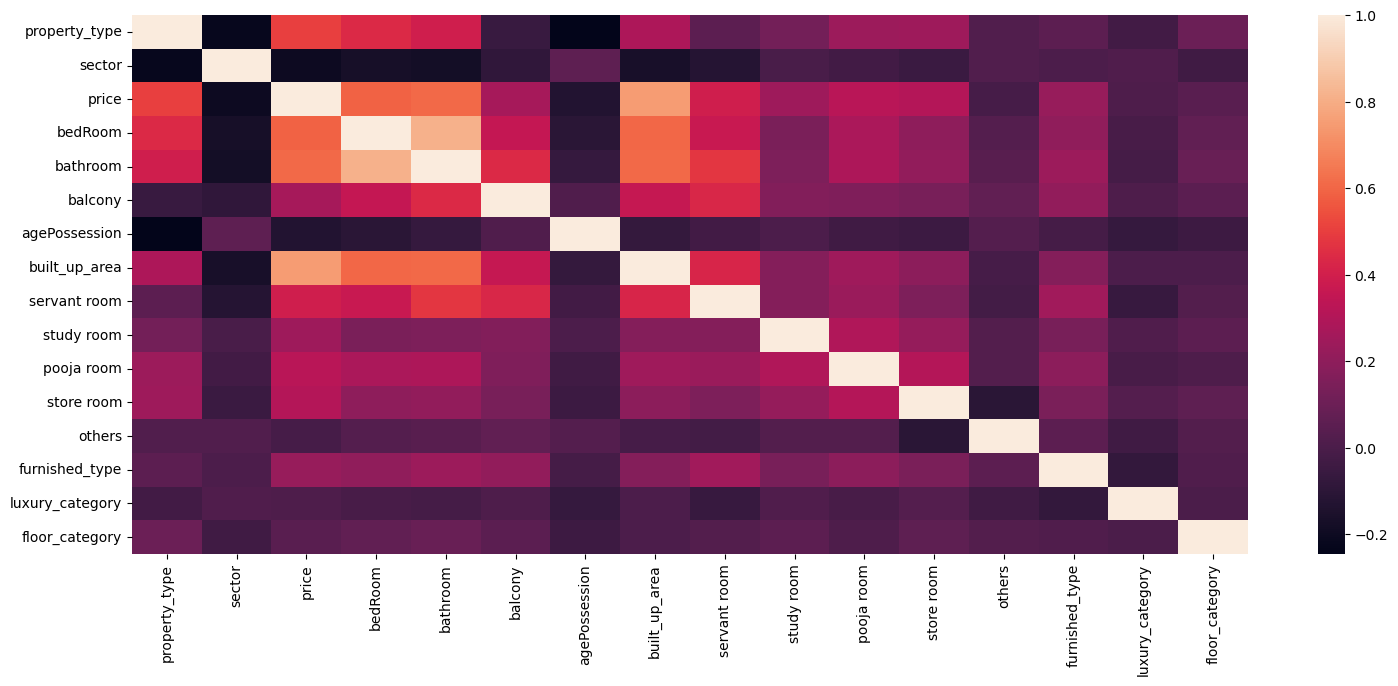

In [174]:
plt.figure(figsize = (18, 7))
sns.heatmap(label_data.corr())
plt.show()

In [175]:
fs_df1 = label_data.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns = {'index':'feature','price':'corr_coeff'}).sort_values(by = 'corr_coeff', ascending = False)

In [176]:
fs_df1

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.748686
3,bathroom,0.609936
2,bedRoom,0.590804
7,servant room,0.392935
9,pooja room,0.319297
10,store room,0.305086
4,balcony,0.270194
8,study room,0.242151
12,furnished_type,0.225631


## Technique 2: Random Forest Feature Importance 

In [177]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_label, y_label)

RandomForestRegressor(random_state=42)

In [178]:
fs_df2 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf.feature_importances_
}).sort_values(by = 'rf_importance', ascending = False)

In [179]:
fs_df2

,feature,rf_importance
6,built_up_area,0.650779
1,sector,0.102360
0,property_type,0.097340
2,bedRoom,0.027458
3,bathroom,0.024996
7,servant room,0.019261
5,agePossession,0.014546
4,balcony,0.012218
10,store room,0.010034
12,furnished_type,0.009594


## Technique 3: Gradient Boosting Feature Importance

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state = 42)
gb.fit(X_label, y_label)

GradientBoostingRegressor(random_state=42)

In [181]:
fs_df3 = pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb.feature_importances_
}).sort_values(by = 'gb_importance', ascending = False)

In [182]:
fs_df3

,feature,gb_importance
6,built_up_area,0.687651
1,sector,0.102628
0,property_type,0.099342
3,bathroom,0.034720
2,bedRoom,0.031099
7,servant room,0.020619
10,store room,0.009172
5,agePossession,0.004245
8,study room,0.003642
12,furnished_type,0.003083


## Technique 4: Permutation Importance

In [183]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, random_state = 42, test_size = 0.2)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_data = rf.fit(X_train, y_train)

perm_imp = permutation_importance(rf_data, X_test, y_test, n_repeats = 30, random_state = 42)

In [184]:
fs_df4 = pd.DataFrame({
    'feature':X_label.columns,
    'permutation_imp':perm_imp.importances_mean
}).sort_values(by = 'permutation_imp', ascending = False)

In [185]:
fs_df4

,feature,permutation_imp
6,built_up_area,0.666926
0,property_type,0.199226
1,sector,0.142456
7,servant room,0.028381
3,bathroom,0.021553
2,bedRoom,0.019432
4,balcony,0.008686
5,agePossession,0.004734
10,store room,0.003710
14,floor_category,0.000670


## Technique 5: LASSO

In [186]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(X_scaled, y_label)

fs_df5 = pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coef':lasso.coef_
}).sort_values(by = 'lasso_coef', ascending = False)

In [187]:
fs_df5

,feature,lasso_coef
6,built_up_area,1.513028
0,property_type,0.709094
3,bathroom,0.278040
10,store room,0.199373
8,study room,0.167472
7,servant room,0.162417
12,furnished_type,0.161092
9,pooja room,0.071927
13,luxury_category,0.050308
2,bedRoom,0.011191


## Technique 6 - Recursive Feature Elimination 

In [188]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor(random_state = 42)

rfe = RFE(estimator, n_features_to_select = X_label.shape[1], step = 1)
rfe = rfe.fit(X_label, y_label)

selected_feature = X_label.columns[rfe.support_]

selected_coefs = rfe.estimator_.feature_importances_

fs_df6 = pd.DataFrame({
    'feature':selected_feature,
    'rfe_coef':selected_coefs
}).sort_values(by = 'rfe_coef', ascending = False)

In [189]:
fs_df6

,feature,rfe_coef
6,built_up_area,0.650779
1,sector,0.102360
0,property_type,0.097340
2,bedRoom,0.027458
3,bathroom,0.024996
7,servant room,0.019261
5,agePossession,0.014546
4,balcony,0.012218
10,store room,0.010034
12,furnished_type,0.009594


## Technique 7 - SHAP

In [190]:
import shap

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

shap_sum = np.abs(shap_values).mean(axis = 0)

shap_values

array([[-1.72926155e-01, -4.04086376e-01, -8.69965185e-03, ...,
        -1.16348015e-02,  8.67133046e-03, -3.05814206e-04],
       [-3.09834458e-01,  5.13691921e-02, -3.40414999e-02, ...,
         1.58220265e-02,  7.06954366e-02, -1.97111178e-02],
       [-3.30978450e-01, -3.23177283e-01, -2.59787550e-02, ...,
        -1.63977370e-02,  2.98123706e-04, -2.09638447e-02],
       ...,
       [-3.80827259e-01,  2.64723727e-01,  2.87662220e-02, ...,
         1.50522607e-02,  2.41000046e-02,  1.23411296e-01],
       [-2.27620258e-01,  6.95551524e-01, -1.39811738e-02, ...,
        -1.00255229e-02,  7.11545304e-03, -5.55104132e-03],
       [-1.80435675e-01, -4.31616259e-01, -4.81008784e-02, ...,
        -1.25696564e-02,  2.95231450e-03, -8.32005180e-03]])

In [191]:
fs_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis = 0)
}).sort_values(by = 'SHAP_score', ascending = False)

fs_df7

,feature,SHAP_score
6,built_up_area,1.247302
0,property_type,0.464898
1,sector,0.378642
3,bathroom,0.119673
7,servant room,0.088903
2,bedRoom,0.056241
4,balcony,0.038001
12,furnished_type,0.029105
5,agePossession,0.028184
14,floor_category,0.022637


## Merging all feature selection dataframe

In [192]:
final_fs = fs_df1.merge(fs_df2, on = 'feature').merge(fs_df3, on = 'feature').merge(fs_df4, on = 'feature').merge(fs_df5, on = 'feature').merge(fs_df6, on = 'feature').merge(fs_df7, on = 'feature')

In [193]:
final_fs

,feature,corr_coeff,rf_importance,gb_importance,permutation_imp,lasso_coef,rfe_coef,SHAP_score
0,built_up_area,0.748686,0.650779,0.687651,0.666926,1.513028,0.650779,1.247302
1,bathroom,0.609936,0.024996,0.034720,0.021553,0.278040,0.024996,0.119673
2,bedRoom,0.590804,0.027458,0.031099,0.019432,0.011191,0.027458,0.056241
3,servant room,0.392935,0.019261,0.020619,0.028381,0.162417,0.019261,0.088903
4,pooja room,0.319297,0.005976,0.000783,-0.003767,0.071927,0.005976,0.009622
5,store room,0.305086,0.010034,0.009172,0.003710,0.199373,0.010034,0.020123
6,balcony,0.270194,0.012218,0.002171,0.008686,-0.042799,0.012218,0.038001
7,study room,0.242151,0.008699,0.003642,-0.001339,0.167472,0.008699,0.020467
8,furnished_type,0.225631,0.009594,0.003083,0.000210,0.161092,0.009594,0.029105
9,floor_category,0.042978,0.006551,0.000329,0.000670,-0.002742,0.006551,0.022637


In [194]:
# normalize the score
final_fs = final_fs.set_index("feature").div(final_fs.drop("feature", axis=1).sum())

In [195]:
final_fs[['corr_coeff', 'rf_importance', 'gb_importance', 'permutation_imp', 'lasso_coef', 'rfe_coef', 'SHAP_score']].mean(axis = 1).sort_values(ascending = False)

feature
built_up_area      0.627048
sector             0.085266
bathroom           0.066746
bedRoom            0.046013
servant room       0.045901
store room         0.030926
study room         0.024355
furnished_type     0.024331
pooja room         0.019607
balcony            0.017063
luxury_category    0.005767
floor_category     0.005429
agePossession      0.001464
others             0.000083
dtype: float64

Drop the columns `others`, `pooja room` as they consistently appear at the bottom of every feature selection technique.

In [197]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

scores = cross_val_score(rf, X_label, y_label, cv = 5, scoring = 'r2')

In [198]:
scores.mean()

np.float64(0.8123888802613868)

In [199]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

scores = cross_val_score(rf, X_label.drop(columns = ['others', 'pooja room']), y_label, cv = 5, scoring = 'r2')

In [200]:
scores.mean()

np.float64(0.8140128911133871)

In [201]:
df.drop(columns = ['others', 'pooja room'], inplace = True)

In [204]:
df.to_csv('gurgaon-post-feature-selection.csv', index = False)